# Using Albumentations to augment keypoints

In this notebook we will show how to apply Albumentations to the keypoint augmentation problem. Please refer to [A list of transforms and their supported targets](https://albumentations.ai/docs/getting_started/transforms_and_targets/#spatial-level-transforms) to see which spatial-level augmentations support keypoints. You can use any pixel-level augmentation to an image with keypoints because pixel-level augmentations don't affect keypoints.

**Note**: by default, augmentations that work with keypoints don't change keypoints' labels after transformation. If keypoints' labels are side-specific, that may pose a problem. For example, if you have a keypoint named `left arm` and apply a HorizontalFlip augmentation, you will get a keypoint with the same `left arm` label, but it will now look like a `right arm` keypoint. See a picture at the end of [this article](https://albumentations.ai/docs/getting_started/keypoints_augmentation/) for a visual example.

If you work with such type of keypoints, consider using SymmetricKeypoints augmentations from [albumentations-experimental](https://github.com/albumentations-team/albumentations_experimental#spatial-level-transforms) that are created precisely to handle that case.

### Import the required libraries

In [20]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

### Define a function to visualize keypoints on an image

In [21]:
KEYPOINT_COLOR = (0, 255, 0) # Green

def vis_keypoints(image, keypoints, color=KEYPOINT_COLOR, diameter=15):
    image = image.copy()

    for (x, y) in keypoints:
        cv2.circle(image, (int(x), int(y)), diameter, (0, 255, 0), -1)
        
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.imshow(image)

#### Get an image and annotations for it

In [22]:
image = cv2.imread('/root/Plate-Landmarks-detection/data/dataset/images/01_0261.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#### Define keypoints

We will use the `xy` format for keypoints' coordinates. Each keypoint is defined with two coordinates, `x` is the position on the x-axis, and `y` is the position on the y-axis. Please refer to this article with the detailed description of formats for keypoints' coordinates - <a href='https://albumentations.ai/docs/getting_started/keypoints_augmentation/' target='_blank'>https://albumentations.ai/docs/getting_started/keypoints_augmentation/</a>

In [23]:
keypoints = [
    (35.04,79.2),
    (214.57, 39.32),
    (216.21, 91.08),
    (38.08, 129.23), 
]

### Visualize the original image with keypoints

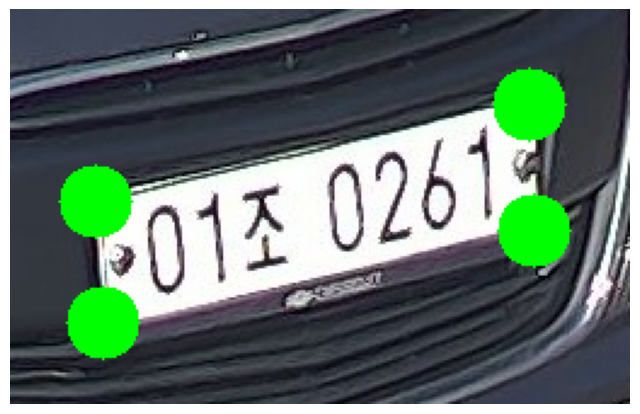

In [24]:
vis_keypoints(image, keypoints)

### Define a simple augmentation pipeline

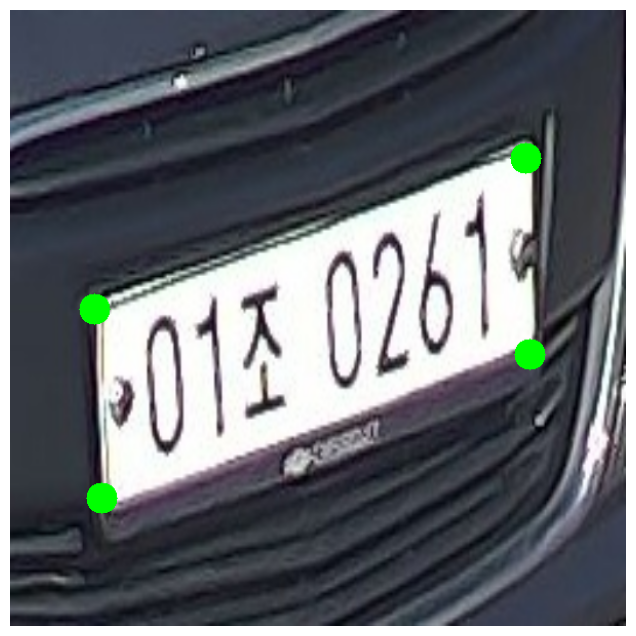

In [31]:
transform = A.Compose(
    A.Resize(600,600), 
    keypoint_params=A.KeypointParams(format='xy')
)
transformed = transform(image=image, keypoints=keypoints)
vis_keypoints(transformed['image'], transformed['keypoints'])

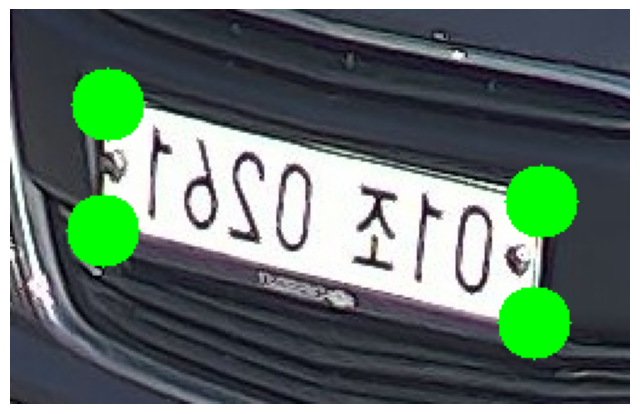

In [9]:
transform = A.Compose(
    [A.HorizontalFlip(p=1)], 
    keypoint_params=A.KeypointParams(format='xy')
)
transformed = transform(image=image, keypoints=keypoints)
vis_keypoints(transformed['image'], transformed['keypoints'])

### A few more examples of augmentation pipelines

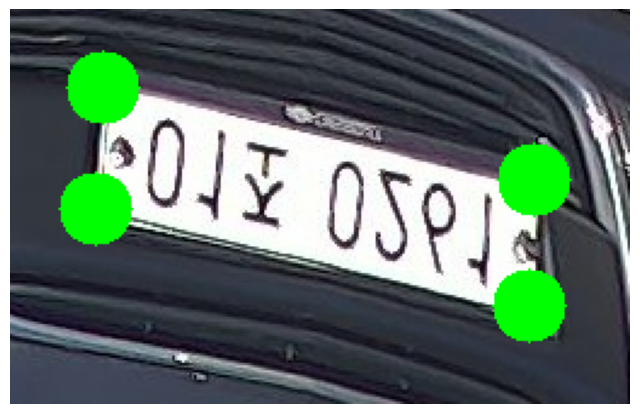

In [10]:
transform = A.Compose(
    [A.VerticalFlip(p=1)], 
    keypoint_params=A.KeypointParams(format='xy')
)
transformed = transform(image=image, keypoints=keypoints)
vis_keypoints(transformed['image'], transformed['keypoints'])

We fix the random seed for visualization purposes, so the augmentation will always produce the same result. In a real computer vision pipeline, you shouldn't fix the random seed before applying a transform to the image because, in that case, the pipeline will always output the same image. The purpose of image augmentation is to use different transformations each time.

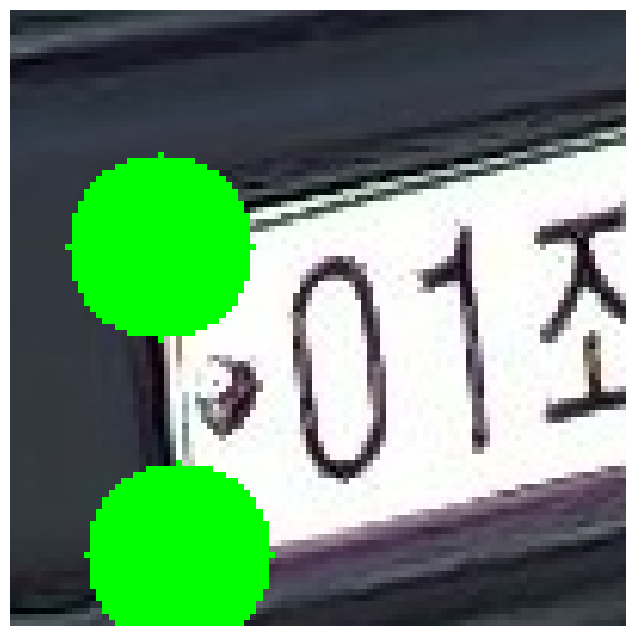

In [13]:
random.seed(7)
transform = A.Compose(
    [A.RandomCrop(width=100, height=100, p=1)], 
    keypoint_params=A.KeypointParams(format='xy')
)
transformed = transform(image=image, keypoints=keypoints)
vis_keypoints(transformed['image'], transformed['keypoints'])

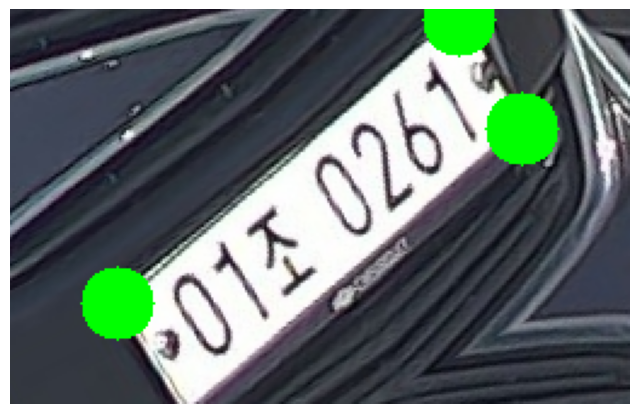

In [15]:
random.seed(7)
transform = A.Compose(
    [A.Rotate(p=0.5)], 
    keypoint_params=A.KeypointParams(format='xy')
)
transformed = transform(image=image, keypoints=keypoints)
vis_keypoints(transformed['image'], transformed['keypoints'])

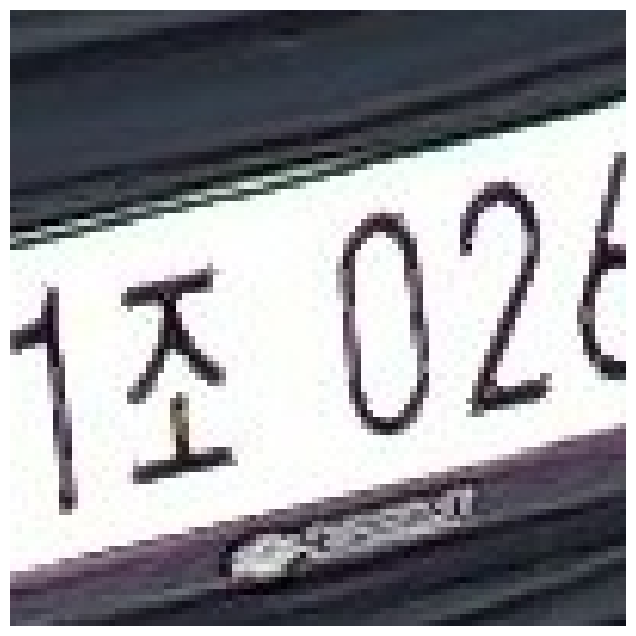

In [17]:
transform = A.Compose(
    [A.CenterCrop(height=100, width=100, p=1)], 
    keypoint_params=A.KeypointParams(format='xy')
)
transformed = transform(image=image, keypoints=keypoints)
vis_keypoints(transformed['image'], transformed['keypoints'])

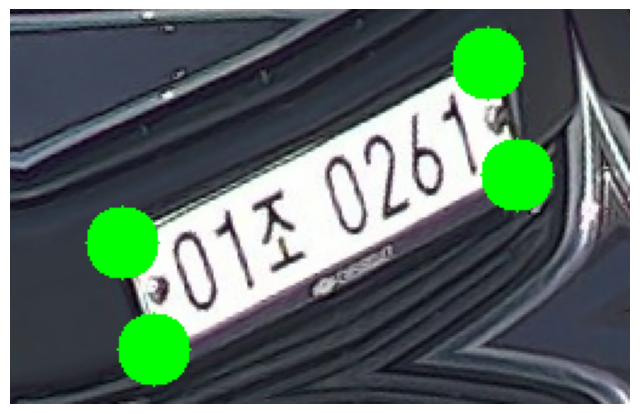

In [18]:
random.seed(7)
transform = A.Compose(
    [A.ShiftScaleRotate(p=0.5)], 
    keypoint_params=A.KeypointParams(format='xy')
)
transformed = transform(image=image, keypoints=keypoints)
vis_keypoints(transformed['image'], transformed['keypoints'])

### An example of complex augmentation pipeline

In [19]:
random.seed(7)
transform = A.Compose([
        A.RandomSizedCrop(min_max_height=(256, 1025), height=512, width=512, p=0.5),
        A.HorizontalFlip(p=0.5),
        A.OneOf([
            A.HueSaturationValue(p=0.5), 
            A.RGBShift(p=0.7)
        ], p=1),                          
        A.RandomBrightnessContrast(p=0.5)
    ], 
    keypoint_params=A.KeypointParams(format='xy'),
)
transformed = transform(image=image, keypoints=keypoints)
vis_keypoints(transformed['image'], transformed['keypoints'])

ValueError: Requested crop size (922, 922) is larger than the image size (163, 256)